<a href="https://colab.research.google.com/github/dasigiraghu96/Deeplearning_Computer_Vision/blob/main/object_detection_tutorial_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection Demo
Welcome to the object detection inference walkthrough!  This notebook will walk you step by step through the process of using a pre-trained model to detect objects in an image. Make sure to follow the [installation instructions](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/installation.md) before you start.

In [ ]:
!pwd
# From Research Folder
%cd /content/drive/MyDrive/TFOD1.X/models/research
#!python setup.py install #install object detection

/content
/content/drive/MyDrive/TFOD1.X/models/research


In [ ]:
!ls

a3c_blogpost			  lm_commonsense
adversarial_crypto		  lstm_object_detection
adversarial_logit_pairing	  marco
adversarial_text		  maskgan
adv_imagenet_models		  minigo
astronet			  morph_net
attention_ocr			  namignizer
audioset			  neural_gpu
autoaugment			  neural_programmer
autoencoder			  next_frame_prediction
brain_coder			  nst_blogpost
build				  object_detection
cognitive_mapping_and_planning	  object_detection.egg-info
cognitive_planning		  pcl_rl
compression			  ptn
cvt_text			  qa_kg
dataset.zip			  README.md
deep_contextual_bandits		  real_nvp
deeplab				  rebar
deep_speech			  resnet
delf				  sentiment_analysis
differential_privacy		  seq2species
dist				  setup.py
domain_adaptation		  skip_thoughts
efficient-hrl			  slim
fivo				  steve
gan				  street
global_objectives		  struct2depth
im2txt				  swivel
inception			  syntaxnet
keypointnet			  tcn
learned_optimizer		  tensorrt
learning_to_remember_rare_events  textsum
learning_unsupervised_learning	  transformer
lexnet_n

In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/train/
  inflating: dataset/train/-1x-1_jpg.rf.22b305fece3a347760bb3c41d38c233b.jpg  
  inflating: dataset/train/-1x-1_jpg.rf.3068b9e8b2ad2a07aa26f023a5fda39f.jpg  
  inflating: dataset/train/-1x-1_jpg.rf.7c8af5f94bfdaa85f2cb76ac9e65bcf8.jpg  
  inflating: dataset/train/-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM_jpeg.rf.91396fa658508edfa783c9127c310541.jpg  
  inflating: dataset/train/-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM_jpeg.rf.9c02cf07d60af0c41ce0328335483da1.jpg  
  inflating: dataset/train/-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM_jpeg.rf.b8cf8297ad824fbb43e0370c45f8a793.jpg  
  inflating: dataset/train/0002526673_jpg.rf.3a00b68590d2c08a30a66c739c04f43c.jpg  
  inflating: dataset/train/0002526673_jpg.rf.7fafc14a360e2592eb7e85f259b5c975.jpg  
  inflating: dataset/train/0002526673_jpg.rf.cfeff0f64a1377e0890d468009942bcd.jpg  
  inflating: dataset/train/000_1ov3n5_0_jpeg.rf.4fc0b0eb395350e3aedc9b3c3f9b9d75.jpg 

In [ ]:
!nvidia-smi
!pip uninstall tensorflow==2.4.1 -y
!pip install tensorflow-gpu==1.14.0
import tensorflow as tf
print(tf.__version__)
print(tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
))
print(tf.test.is_built_with_cuda())

Thu Apr  1 03:34:52 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0
True
True


# Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar -xvf faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

faster_rcnn_inception_v2_coco_2018_01_28/
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
faster_rcnn_inception_v2_coco_2018_01_28/checkpoint
faster_rcnn_inception_v2_coco_2018_01_28/pipeline.config
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.meta
faster_rcnn_inception_v2_coco_2018_01_28/saved_model/
faster_rcnn_inception_v2_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_inception_v2_coco_2018_01_28/saved_model/variables/
faster_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb


In [ ]:
%cd /content/drive/MyDrive/TFOD1.X/models/research

/content/drive/MyDrive/TFOD1.X/models/research


In [ ]:
!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

--2021-03-31 17:20:43--  http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.195.128, 2607:f8b0:400e:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.195.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149119618 (142M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’

faster_rcnn_incepti 100%[===================>] 142.21M  85.9MB/s    in 1.7s    

2021-03-31 17:20:45 (85.9 MB/s) - ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [149119618/149119618]



In [ ]:
!ls

a3c_blogpost					 lm_1b
adversarial_crypto				 lm_commonsense
adversarial_logit_pairing			 lstm_object_detection
adversarial_text				 marco
adv_imagenet_models				 maskgan
astronet					 minigo
attention_ocr					 morph_net
audioset					 namignizer
autoaugment					 neural_gpu
autoencoder					 neural_programmer
brain_coder					 next_frame_prediction
build						 nst_blogpost
cognitive_mapping_and_planning			 object_detection
cognitive_planning				 object_detection.egg-info
compression					 pcl_rl
cvt_text					 ptn
dataset						 qa_kg
dataset.zip					 README.md
deep_contextual_bandits				 real_nvp
deeplab						 rebar
deep_speech					 resnet
delf						 sentiment_analysis
differential_privacy				 seq2species
dist						 setup.py
domain_adaptation				 skip_thoughts
efficient-hrl					 slim
faster_rcnn_inception_v2_coco_2018_01_28.tar.gz  steve
fivo						 street
gan						 struct2depth
global_objectives				 swivel
im2txt						 syntaxnet
inception					 tcn
keypointnet					 tensorrt
learned_optimize

In [ ]:
!mv faster_rcnn_inception_v2_coco_2018_01_28/ faster_rcnn

In [ ]:
!ls

a3c_blogpost					 lfads
adversarial_crypto				 lm_1b
adversarial_logit_pairing			 lm_commonsense
adversarial_text				 lstm_object_detection
adv_imagenet_models				 marco
astronet					 maskgan
attention_ocr					 minigo
audioset					 morph_net
autoaugment					 namignizer
autoencoder					 neural_gpu
brain_coder					 neural_programmer
build						 next_frame_prediction
cognitive_mapping_and_planning			 nst_blogpost
cognitive_planning				 object_detection
compression					 object_detection.egg-info
cvt_text					 pcl_rl
dataset						 ptn
dataset.zip					 qa_kg
deep_contextual_bandits				 README.md
deeplab						 real_nvp
deep_speech					 rebar
delf						 resnet
differential_privacy				 sentiment_analysis
dist						 seq2species
domain_adaptation				 setup.py
efficient-hrl					 skip_thoughts
faster_rcnn					 slim
faster_rcnn_inception_v2_coco_2018_01_28.tar.gz  steve
fivo						 street
gan						 struct2depth
global_objectives				 swivel
im2txt						 syntaxnet
inception					 tcn
keypointnet					 te

In [ ]:
#copy training,record.py files to research folder from utils
#training should have labelmap.pbtxt,faster_rcnn_inception_v2_coco.config(available in object_detection/samples/config)
!ls

a3c_blogpost					 lfads
adversarial_crypto				 lm_1b
adversarial_logit_pairing			 lm_commonsense
adversarial_text				 lstm_object_detection
adv_imagenet_models				 marco
astronet					 maskgan
attention_ocr					 minigo
audioset					 morph_net
autoaugment					 namignizer
autoencoder					 neural_gpu
brain_coder					 neural_programmer
build						 next_frame_prediction
cognitive_mapping_and_planning			 nst_blogpost
cognitive_planning				 object_detection
compression					 object_detection.egg-info
cvt_text					 pcl_rl
dataset						 ptn
dataset.zip					 qa_kg
deep_contextual_bandits				 README.md
deeplab						 real_nvp
deep_speech					 rebar
delf						 resnet
differential_privacy				 sentiment_analysis
dist						 seq2species
domain_adaptation				 setup.py
efficient-hrl					 skip_thoughts
faster_rcnn					 slim
faster_rcnn_inception_v2_coco_2018_01_28.tar.gz  steve
fivo						 street
gan						 struct2depth
generate_tfrecord.py				 swivel
global_objectives				 syntaxnet
im2txt						 tcn
inception

In [ ]:
!python generate_tfrecord.py --csv_input=dataset/train/train.csv --image_dir=dataset/train --output_path=train.record


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
!python generate_tfrecord.py --csv_input=dataset/test/test.csv --image_dir=dataset/test --output_path=test.record

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
%cd /content/drive/MyDrive/TFOD1.X/models/research

/content/drive/MyDrive/TFOD1.X/models/research


In [ ]:
!python train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/faster_rcnn_inception_v2_coco.config

Streaming output truncated to the last 5000 lines.
INFO:tensorflow:global step 7508: loss = 0.1140 (0.140 sec/step)
I0401 04:08:09.741529 140211978708864 learning.py:507] global step 7508: loss = 0.1140 (0.140 sec/step)
INFO:tensorflow:global step 7509: loss = 0.1730 (0.136 sec/step)
I0401 04:08:09.878645 140211978708864 learning.py:507] global step 7509: loss = 0.1730 (0.136 sec/step)
INFO:tensorflow:global step 7510: loss = 0.4868 (0.152 sec/step)
I0401 04:08:10.031905 140211978708864 learning.py:507] global step 7510: loss = 0.4868 (0.152 sec/step)
INFO:tensorflow:global step 7511: loss = 0.4264 (0.140 sec/step)
I0401 04:08:10.173279 140211978708864 learning.py:507] global step 7511: loss = 0.4264 (0.140 sec/step)
INFO:tensorflow:global step 7512: loss = 0.1962 (0.152 sec/step)
I0401 04:08:10.326234 140211978708864 learning.py:507] global step 7512: loss = 0.1962 (0.152 sec/step)
INFO:tensorflow:global step 7513: loss = 0.2663 (0.147 sec/step)
I0401 04:08:10.474195 140211978708864 l

In [ ]:
%cd /content/drive/MyDrive/TFOD1.X/models/research
!python export_inference_graph.py --input_type image_tensor --pipeline_config_path training/faster_rcnn_inception_v2_coco.config --trained_checkpoint_prefix training/model.ckpt-10000 --output_directory inference_graph

/content/drive/MyDrive/TFOD1.X/models/research
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtyp

In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')


## Env setup

In [ ]:
# This is needed to display the images.
%matplotlib inline

In [ ]:
%cd /content/drive/MyDrive/TFOD1.X/models/research
!python setup.py install

/content/drive/MyDrive/TFOD1.X/models/research
running install
running bdist_egg
running egg_info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
reading manifest file 'object_detection.egg-info/SOURCES.txt'
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/__init__.py -> build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/eval_util.py -> build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/model_tpu_main.py -> build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/inputs.py -> b

## Object detection imports
Here are the imports from the object detection module.

In [ ]:
%cd object_detection


/content/drive/My Drive/TFOD1.X/models/research/object_detection


In [ ]:
from utils import label_map_util

from utils import visualization_utils as vis_util

# Model preparation 

## Variables

Any model exported using the `export_inference_graph.py` tool can be loaded here simply by changing `PATH_TO_FROZEN_GRAPH` to point to a new .pb file.  

By default we use an "SSD with Mobilenet" model here. See the [detection model zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.

In [ ]:
# What model to download.
#MODEL_NAME = 'faster_rcnn_inception_v2_coco_2018_01_28.tar.gz'
#MODEL_FILE = MODEL_NAME + '.tar.gz'
#DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = '/content/drive/MyDrive/TFOD1.X/models/research/inference_graph/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/drive/MyDrive/TFOD1.X/models/research/training/labelmap.pbtxt'

## Download Model

In [ ]:
'''opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
  file_name = os.path.basename(file.name)
  if 'frozen_inference_graph.pb' in file_name:
    tar_file.extract(file, os.getcwd())'''

"opener = urllib.request.URLopener()\nopener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)\ntar_file = tarfile.open(MODEL_FILE)\nfor file in tar_file.getmembers():\n  file_name = os.path.basename(file.name)\n  if 'frozen_inference_graph.pb' in file_name:\n    tar_file.extract(file, os.getcwd())"

## Load a (frozen) Tensorflow model into memory.

In [ ]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

## Helper code

In [ ]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Detection

In [ ]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'download{}.jpg'.format(i)) for i in range(1, 4) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [ ]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

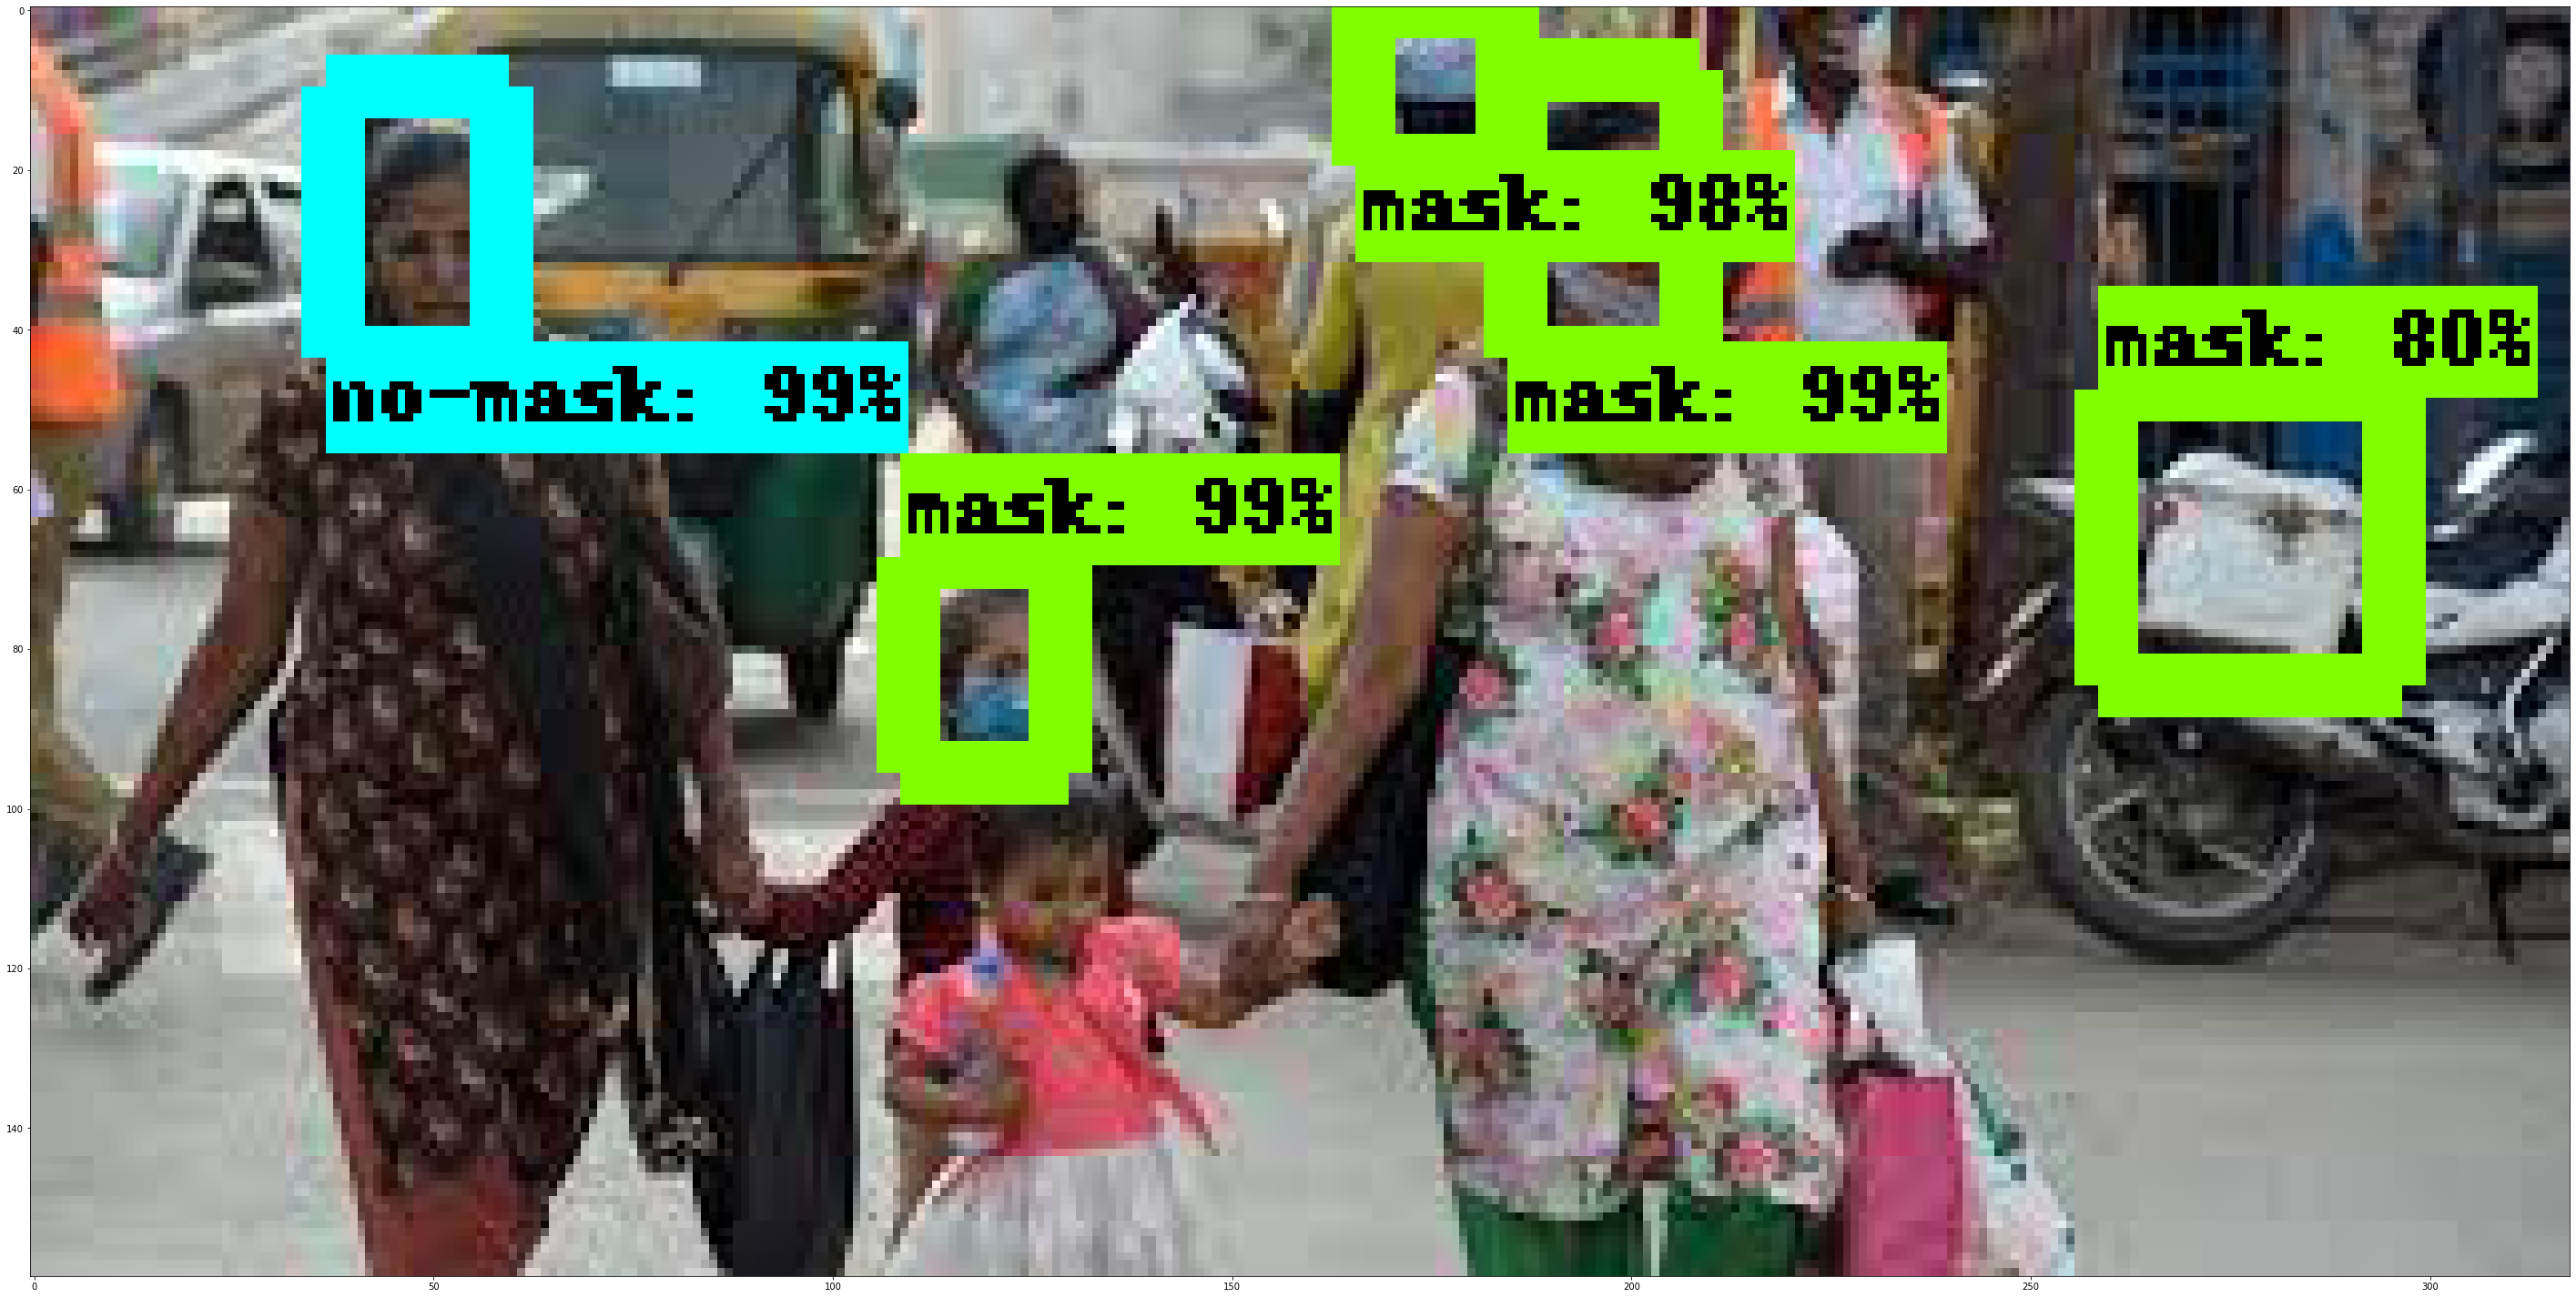

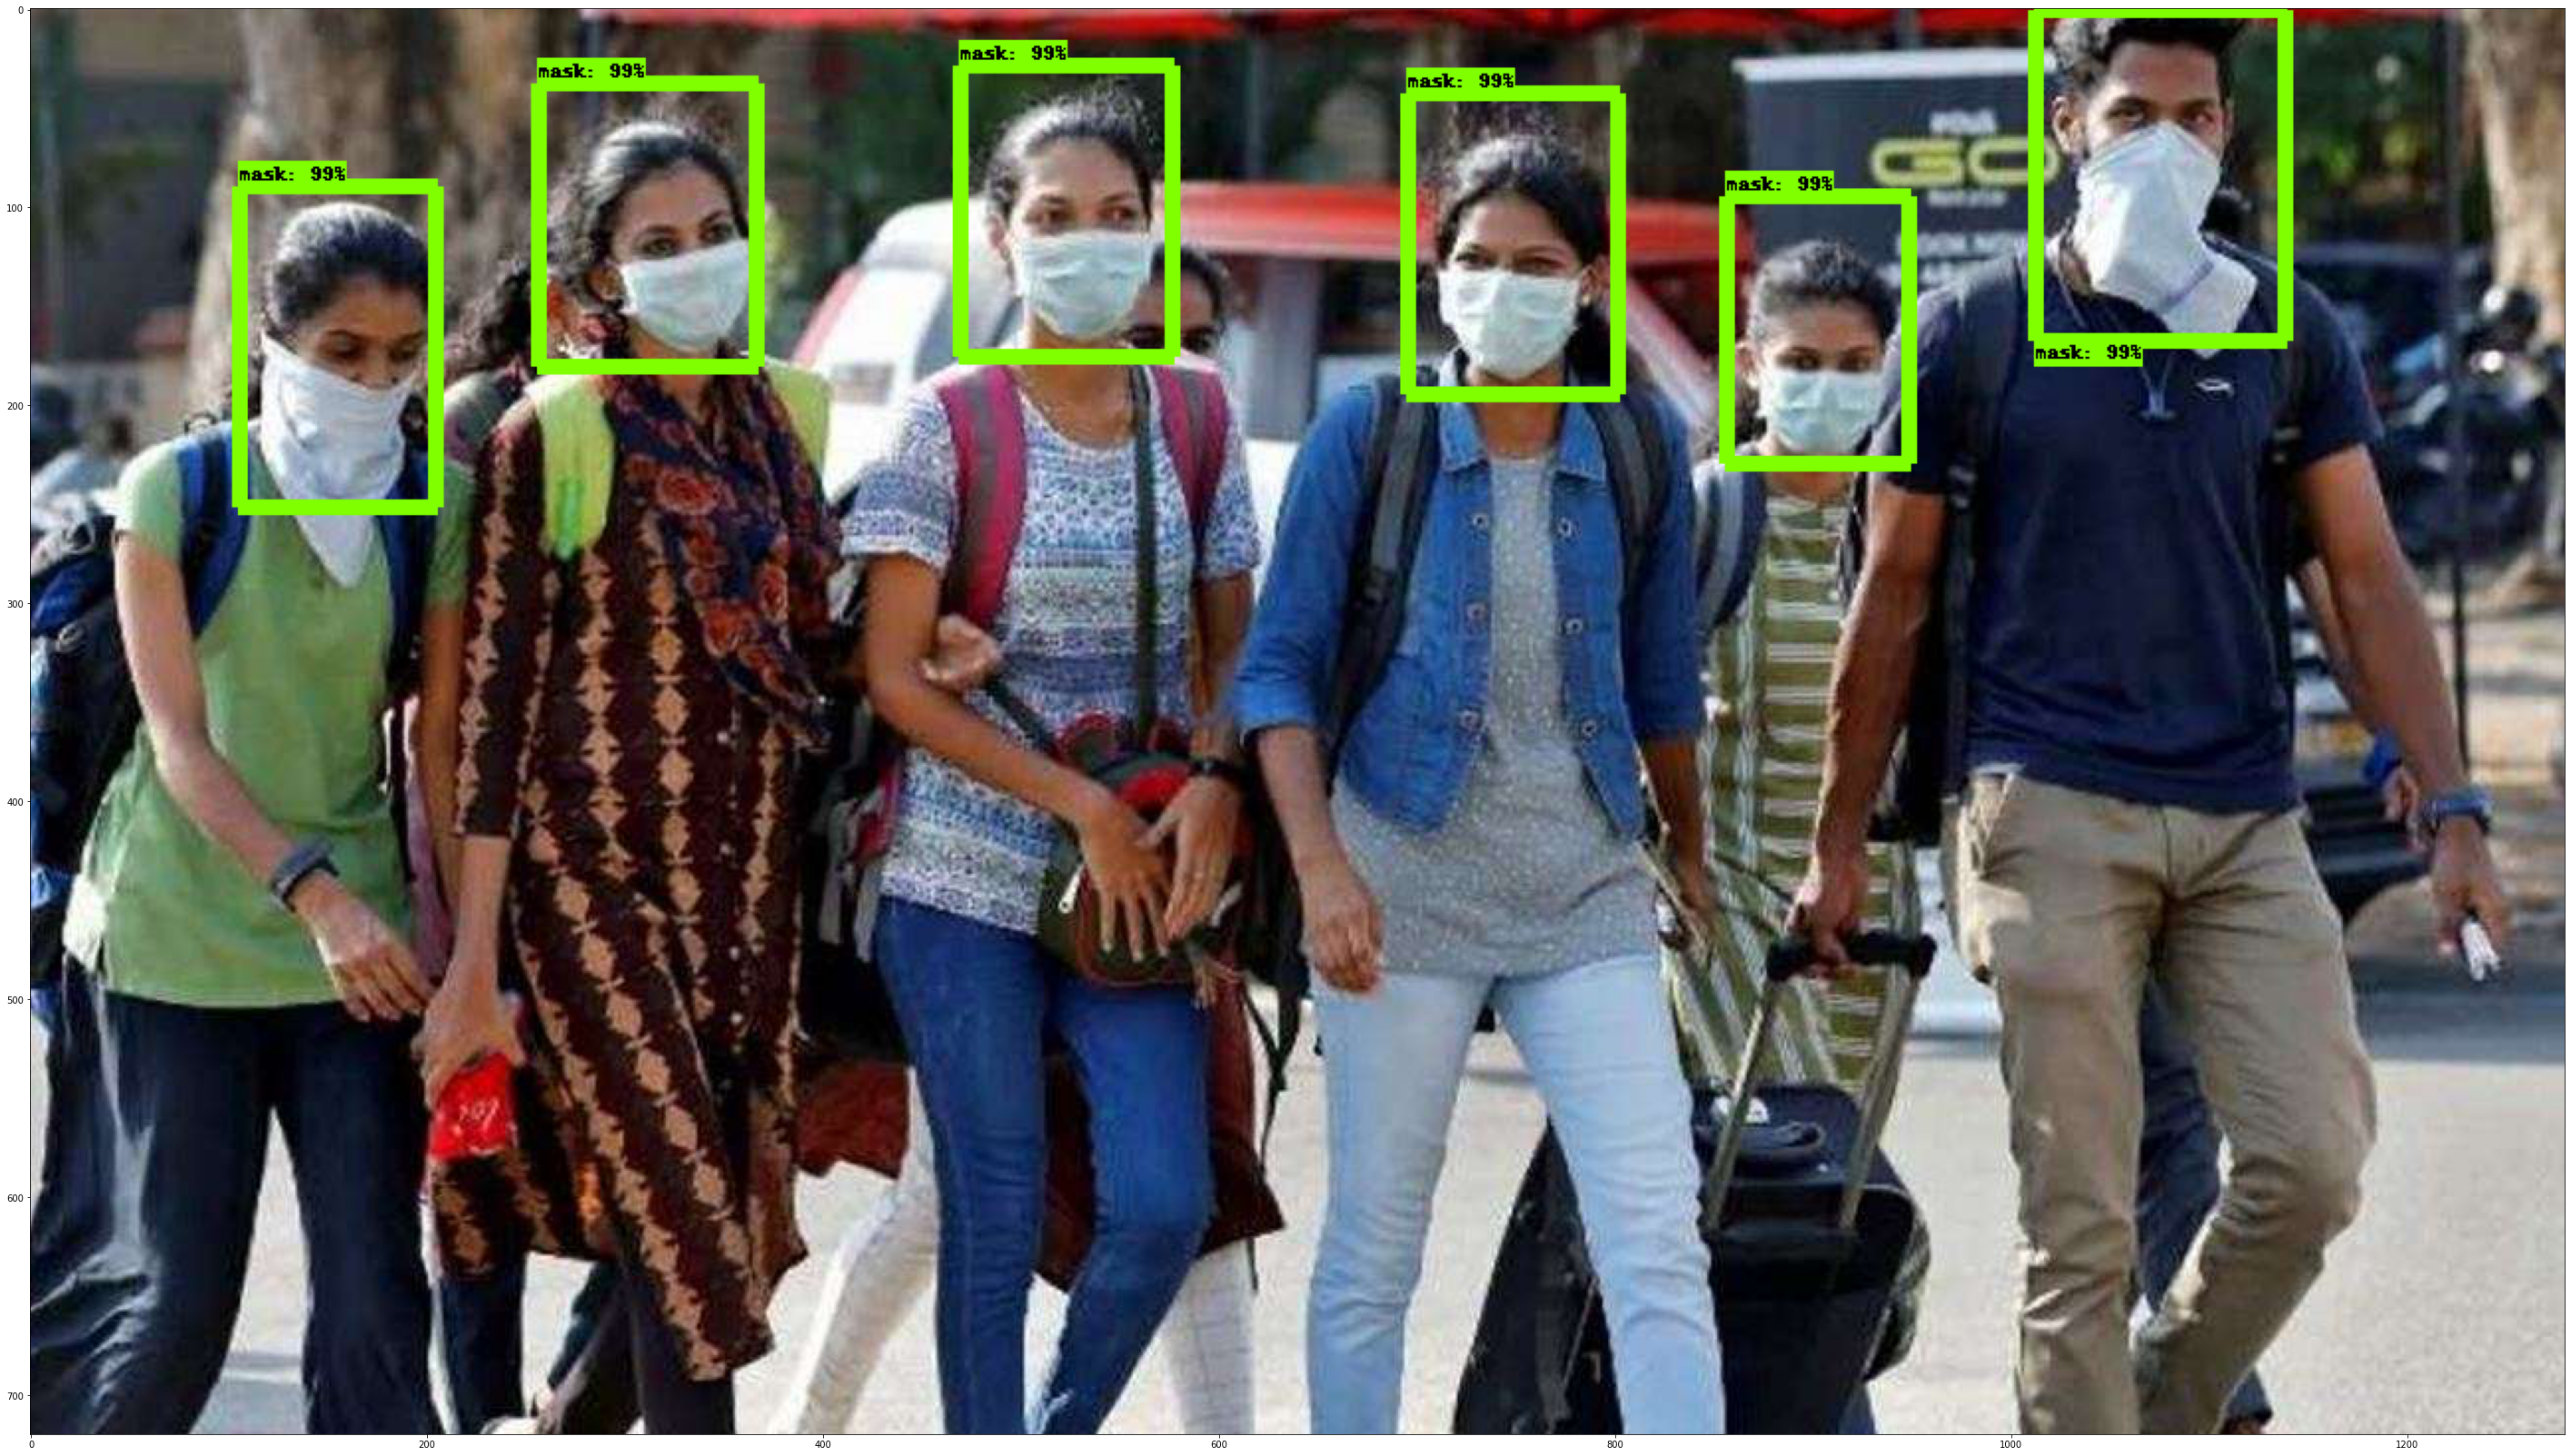

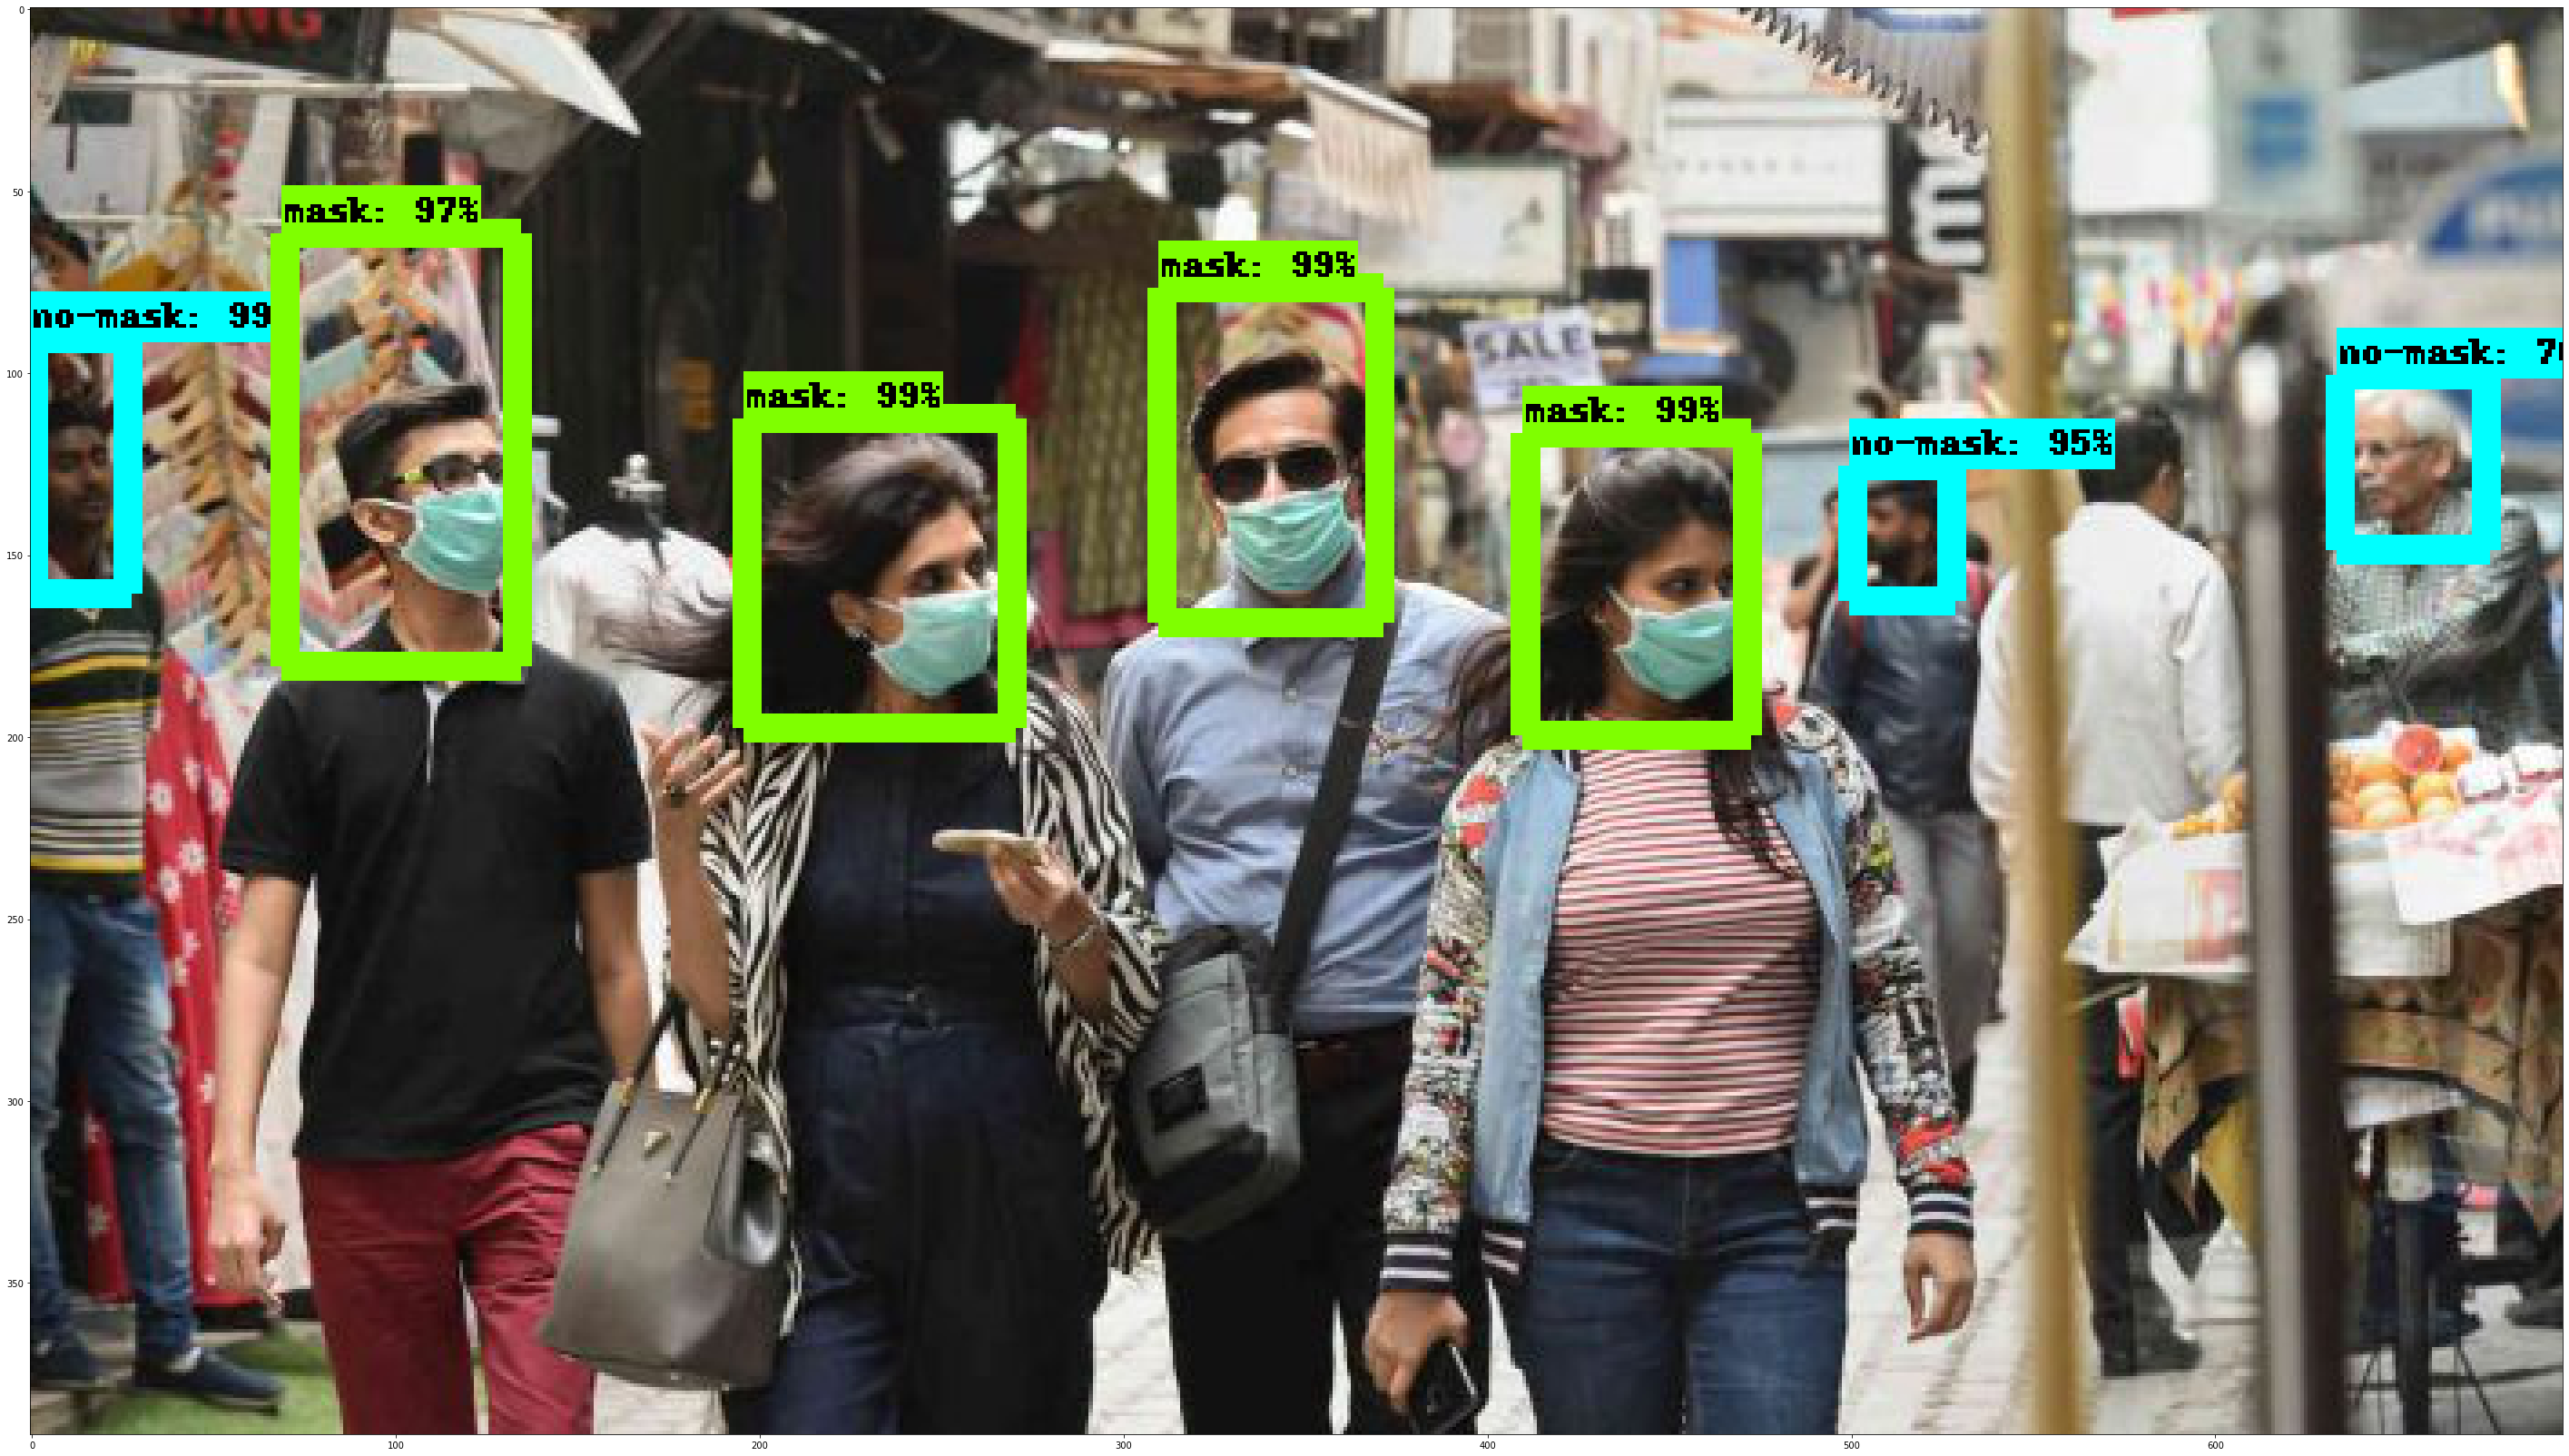

In [ ]:
% matplotlib inline
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=(50,50))
  plt.imshow(image_np)